`Pandas` is a data manipulation library. 2 primary Datastructures<br>
-Series -1 Dimensional <br>
-DataFrame -2 dimensional

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Series from List
data  =[1,2,3,4,5]
ser1 = pd.Series(data)
print(ser1)
print(type(ser1))
print(ser1.dtype)

# Series from dict
#Dictionary key becomes the index
data_dict ={'a':1,'b':2,'c':3}
ser2 = pd.Series(data_dict)
print(ser2)
print(ser2['b']) 

0    1
1    2
2    3
3    4
4    5
dtype: int64
<class 'pandas.core.series.Series'>
int64
a    1
b    2
c    3
dtype: int64
2


In [4]:
#Dataframe :Structures as rows and columns ,similar to excel 
data ={
    'Name':['Thaju','Haries','Muthu'],
    'Age' :[25,30,33]
}

df = pd.DataFrame(data)
display(df)

,Name,Age
0,Thaju,25
1,Haries,30
2,Muthu,33


In [7]:
# Create a datframe from a list of dictionary
data =[
    {'Name':'Thaju','Age':25},
    {'Name':'Haries','Age':30},
    {'Name':'Amju','Age':33},
    {'Name':'Fadhu','Age':7}
]

df2 = pd.DataFrame(data)
display(df2)

,Name,Age
0,Thaju,25
1,Haries,30
2,Amju,33
3,Fadhu,7


In [8]:
# Accessing Data from DF
print(df2['Name'])
print(type(df2['Name']))

0     Thaju
1    Haries
2      Amju
3     Fadhu
Name: Name, dtype: object
<class 'pandas.core.series.Series'>


`df.at[row,col_index]` for picking the exact elemet

In [9]:
print(df2.at[1,'Name'])

Haries


In [10]:
#Adding a new column in pandas
df['location'] =['Banglore','Chennai','Kottngal']
display(df)
# dropping a column in pandas
df.drop(['location'],axis =1,inplace =True)
display(df)

,Name,Age,location
0,Thaju,25,Banglore
1,Haries,30,Chennai
2,Muthu,33,Kottngal


,Name,Age
0,Thaju,25
1,Haries,30
2,Muthu,33


In [21]:
df = pd.read_csv('data.csv')
display(df.head(10))
print(df.describe())

,Date,Category,Value,Product,Sales,Region
0,2023-01-01,A,28.0,Product1,754.0,East
1,2023-01-02,B,39.0,Product3,110.0,North
2,2023-01-03,C,32.0,Product2,398.0,East
3,2023-01-04,B,8.0,Product1,522.0,East
4,2023-01-05,B,26.0,Product3,869.0,North
5,2023-01-06,B,54.0,Product3,192.0,West
6,2023-01-07,A,16.0,Product1,936.0,East
7,2023-01-08,C,89.0,Product1,488.0,West
8,2023-01-09,C,37.0,Product3,772.0,West
9,2023-01-10,A,22.0,Product2,834.0,West


           Value       Sales
count  47.000000   46.000000
mean   51.744681  557.130435
std    29.050532  274.598584
min     2.000000  108.000000
25%    27.500000  339.000000
50%    54.000000  591.500000
75%    70.000000  767.500000
max    99.000000  992.000000


In [22]:
## handling null values  
print(df.isnull().any())
print(df.isnull().sum())
df.fillna(0) # df['sales].fillna(df['sales'].mean())
print(df.isnull().sum())



Date        False
Category    False
Value        True
Product     False
Sales        True
Region      False
dtype: bool
Date        0
Category    0
Value       3
Product     0
Sales       4
Region      0
dtype: int64
Date        0
Category    0
Value       0
Product     0
Sales       0
Region      0
dtype: int64


In [23]:
#Renaming columns
#we rename using key value pair
df.rename(columns={'Date':'date1'},inplace=True)

In [33]:
#changing datatypes
df['Value'] = df['Value'].astype(int)

In [34]:
#apply function will apply the function over on whole row
df['value_new'] = df['Value'].apply(lambda x:x*2)
display(df.head(5))

,date1,Category,Value,Product,Sales,Region,value_new
0,2023-01-01,A,28,Product1,754.0,East,56
1,2023-01-02,B,39,Product3,110.0,North,78
2,2023-01-03,C,32,Product2,398.0,East,64
3,2023-01-04,B,8,Product1,522.0,East,16
4,2023-01-05,B,26,Product3,869.0,North,52


In [39]:
#Data aggregation and Grouping
grouped_df = df.groupby('Product')['Value'].mean()
print(grouped_df)
grouped_df_1 = df.groupby(['Product','Region'])['Value'].sum()
grouped_df_2 = df.groupby(['Product','Region'])['Value'].agg(['mean','sum','count'])
print(grouped_df_1)
print(grouped_df_2)


Product
Product1    40.437500
Product2    52.800000
Product3    52.263158
Name: Value, dtype: float64
Product   Region
Product1  East      292
          North       9
          South     100
          West      246
Product2  East       56
          North     127
          South     181
          West      428
Product3  East      202
          North     203
          South     215
          West      373
Name: Value, dtype: int64
                      mean  sum  count
Product  Region                       
Product1 East    41.714286  292      7
         North    3.000000    9      3
         South   50.000000  100      2
         West    61.500000  246      4
Product2 East    28.000000   56      2
         North   63.500000  127      2
         South   60.333333  181      3
         West    53.500000  428      8
Product3 East    50.500000  202      4
         North   33.833333  203      6
         South   71.666667  215      3
         West    62.166667  373      6


In [47]:
#merging and joining
df1 = pd.DataFrame({'key':['A','B','C'],'Values1':[1,2,3]})
df2 = pd.DataFrame({'key':['A','B','D'],'Values2':[4,5,6]})
df3 = pd.merge(df1,df2,on ="key" ,how ="right")
print(df3)


  key  Values1  Values2
0   A      1.0        4
1   B      2.0        5
2   D      NaN        6


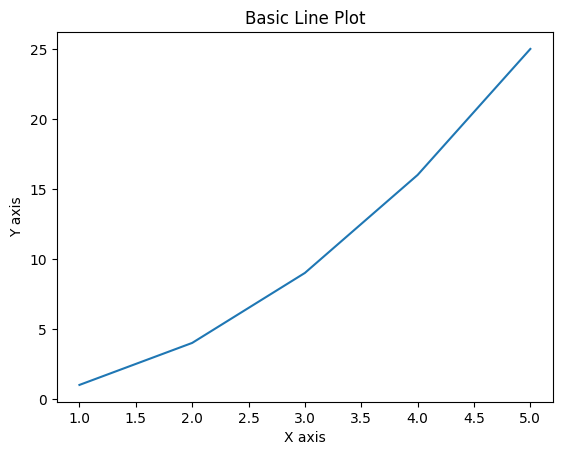

In [54]:
#matplotlib

x=[1,2,3,4,5]
y=[1,4,9,16,25]

plt.plot(x,y)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Basic Line Plot")
plt.show()

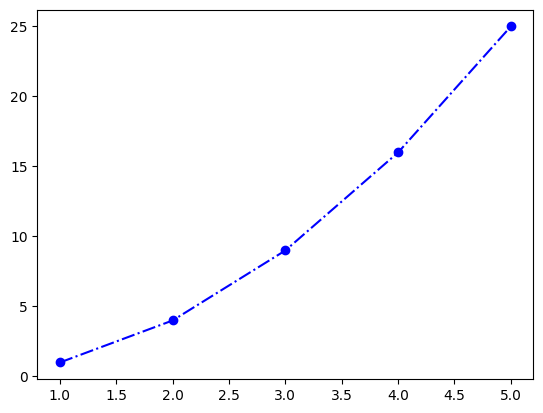

In [59]:
x=[1,2,3,4,5]
y=[1,4,9,16,25]

plt.plot(x,y,color ='blue',linestyle ="-.",marker ="o")

Text(0.5, 1.0, 'x=y^^3')

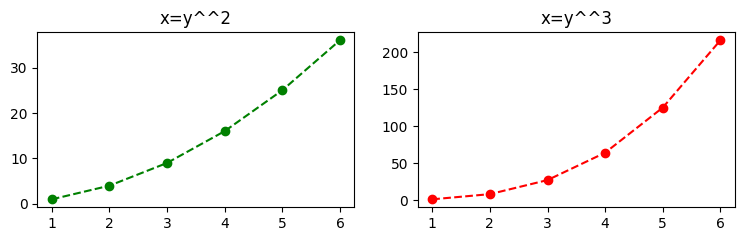

In [65]:
##Multiple Plots
x =[1,2,3,4,5,6]
y1 = [1,4,9,16,25,36]
y2 = [1,8,27,64,125,216]

plt.figure(figsize=(9,5))

plt.subplot(2,2,1) # Divide the figure into 1 row, 2 columns, and select the first subplot
plt.plot(x,y1,color = 'green' ,marker ="o",linestyle='--')
plt.title("x=y^^2")

plt.subplot(2,2,2) # Divide the figure into 1 row, 2 columns, and select the second subplot
plt.plot(x,y2,color = 'red' ,marker ="o",linestyle='--')
plt.title("x=y^^3")

<BarContainer object of 4 artists>

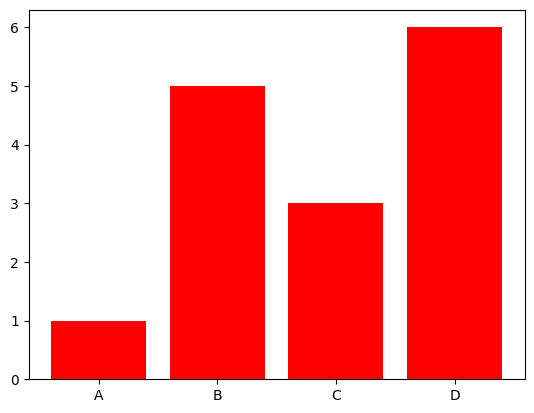

In [66]:
#barplot
categories = ["A","B","C","D"]
values =[1,5,3,6]
plt.bar(categories,values,color = "red")

(array([1., 2., 6., 3., 5.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

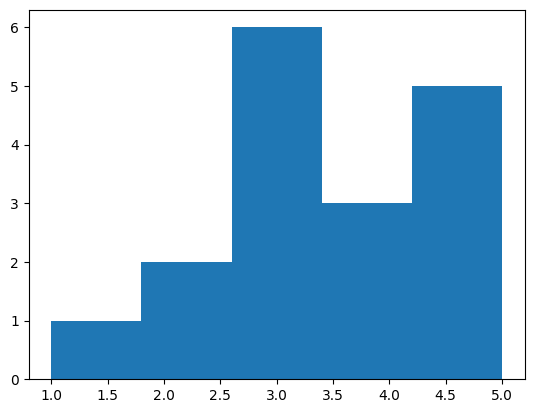

In [68]:
data =[1,2,3,3,4,5,4,3,3,3,5,5,5,5,2,3,4]
plt.hist(data ,bins = 5)

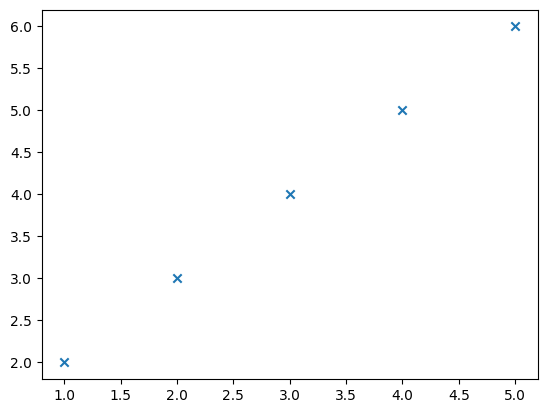

In [69]:
## scatter plot
x = [1,2,3,4,5]
y =[2,3,4,5,6]
plt.scatter(x,y,marker='x')



([<matplotlib.patches.Wedge at 0x1d70d6c1e80>,
 [Text(0.7641207377093499, 1.0517221582730485, 'A'),
  Text(-0.6524417920501352, 0.8980087460522911, 'B'),
  Text(-1.0556727191858863, 0.3430089065413273, 'C'),
  Text(-0.43262394661203507, -1.3314790726173007, 'D'),
  Text(0.9890172332410706, -0.5039294716050831, 'E'),
  Text(1.0963340773122743, -0.17364213464434353, 'F')],
 [Text(0.47022814628267684, 0.6472136358603374, '30.0%'),
  Text(-0.3585490929284526, 0.4935003018845923, '10.0%'),
  Text(-0.5801444673003519, 0.18850039008126995, '10.0%'),
  Text(-0.27811539425059395, -0.8559508323968361, '40.0%'),
  Text(0.543513975024372, -0.2769342141253159, '5.0%'),
  Text(0.6024898983427813, -0.09542495687662121, '5.0%')])

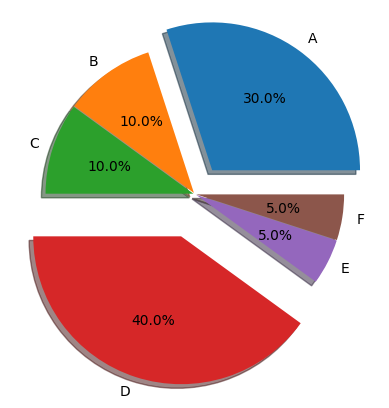

In [77]:
labels =['A','B','C','D','E','F']
sizes =[30,10,10,40,5,5]
#we can also give colurs also in list colors =[mention colors]
explode = (0.2,0.01,0.01,0.3,0.01,0.01)# show the pie chart as separte pieces
plt.pie(sizes,labels = labels ,autopct="%1.1f%%",shadow=True,explode = explode)

In [78]:
#sales
sales_data = pd.read_csv('sales_data.csv')
display(sales_data.head(5))

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


Product Category
Beauty Products     2621.90
Books               1861.93
Clothing            8128.93
Electronics        34982.41
Home Appliances    18646.16
Sports             14326.52
Name: Total Revenue, dtype: float64

<Axes: xlabel='Product Category'>

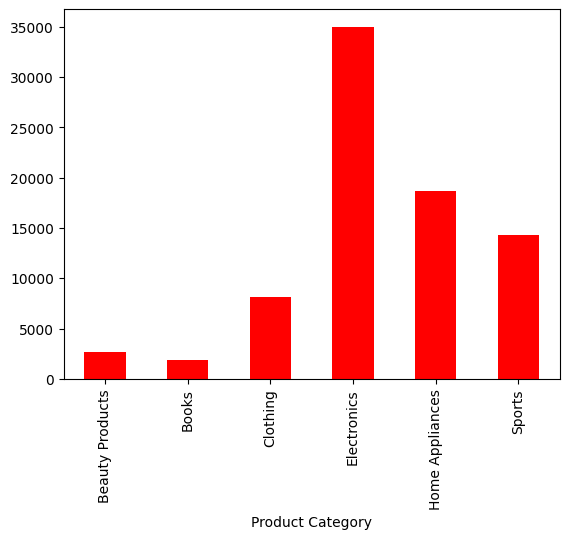

In [83]:
#plot total sales by product
products_by_sales = sales_data.groupby(['Product Category'])['Total Revenue'].agg("sum")
display(products_by_sales)
products_by_sales.plot(kind ='bar',color ='red')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


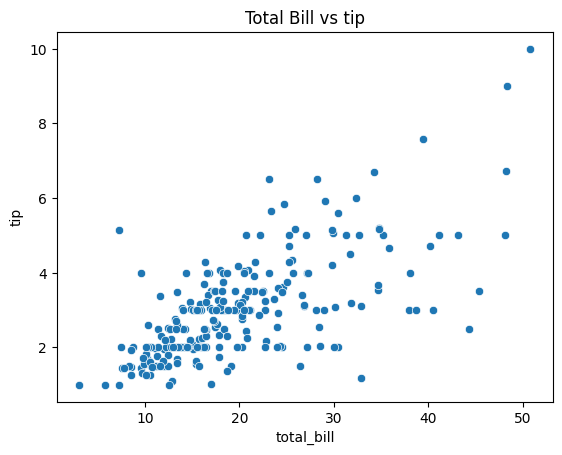

In [88]:
import seaborn as sns
tips = sns.load_dataset("tips")
display(tips)
sns.scatterplot(x= 'total_bill' ,y = 'tip',data =tips)
plt.title("Total Bill vs tip")
plt.show()

Text(0.5, 1.0, 'lineplot')

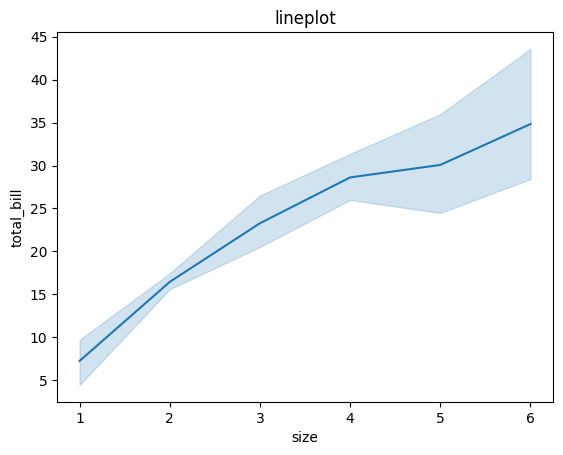

In [89]:
# Line Plot
sns.lineplot(x='size',y='total_bill',data =tips)
plt.title("lineplot")

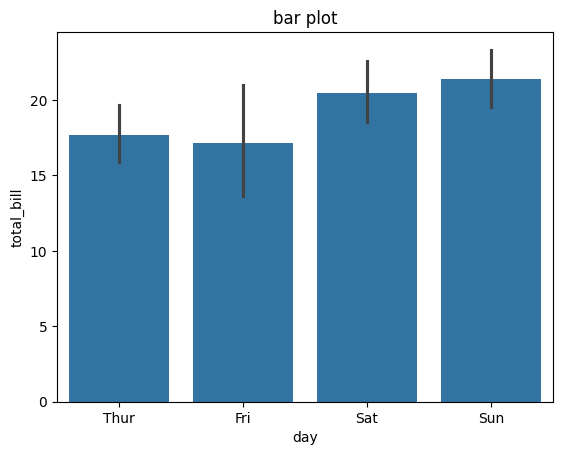

In [90]:
sns.barplot(x='day',y='total_bill',data=tips)
plt.title("bar plot")
plt.show()

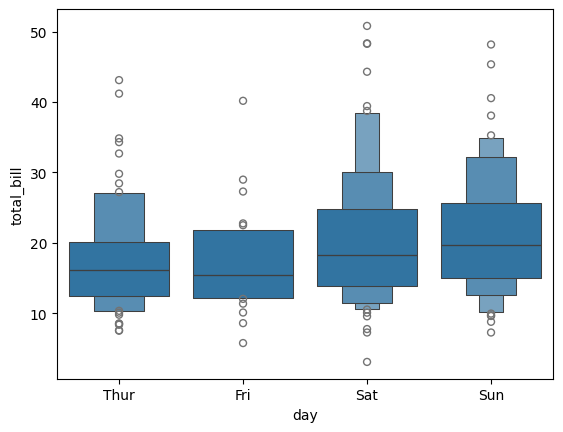

In [92]:
##box plot
sns.boxenplot(x='day',y='total_bill',data =tips,)
plt.show()

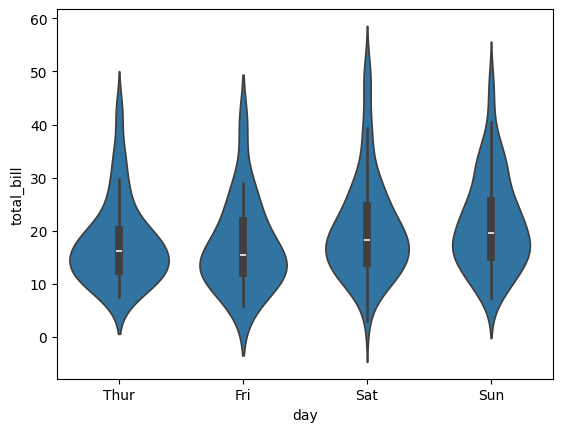

In [93]:
#violin plt
sns.violinplot(x='day',y='total_bill',data =tips,)
plt.show()

<Axes: xlabel='total_bill', ylabel='Count'>

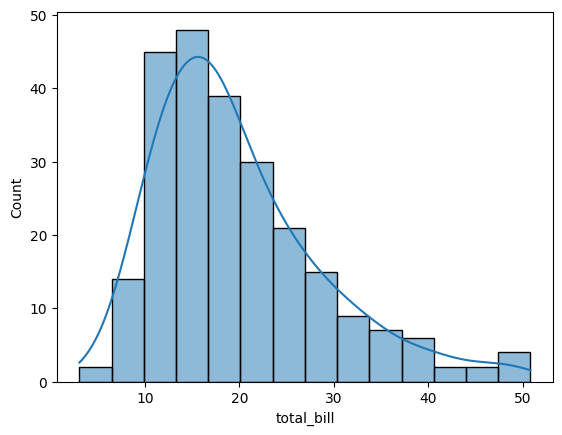

In [96]:
#histogram
sns.histplot(tips['total_bill'],kde = True)

<Axes: xlabel='total_bill', ylabel='Density'>

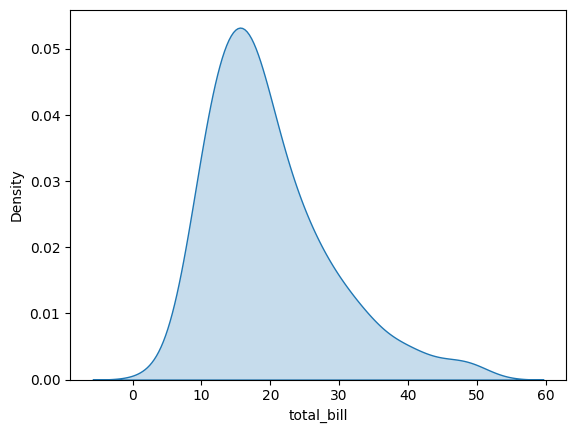

In [98]:
#kdeplt
sns.kdeplot(tips['total_bill'],fill =True)

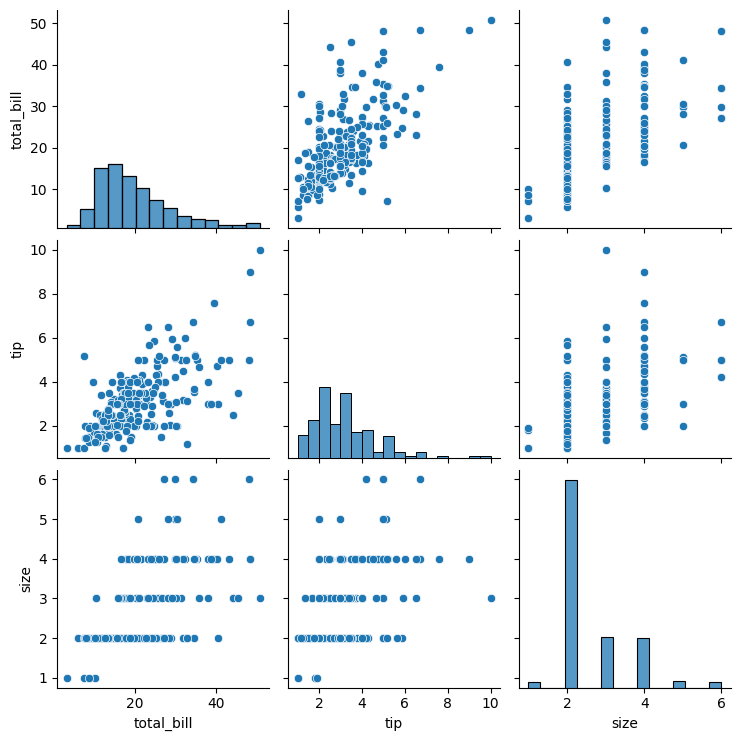

In [100]:
#pairplt
sns.pairplot(tips)

<Axes: >

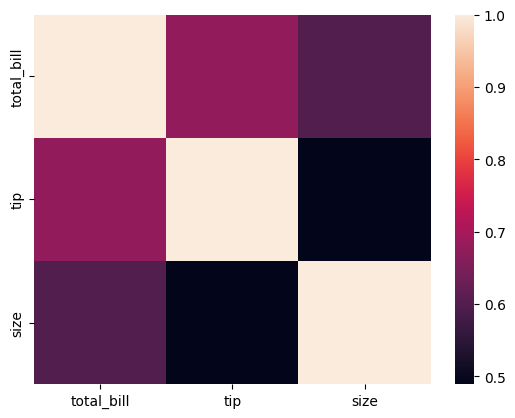

In [103]:
#correlation
corr = tips[['total_bill','tip','size']].corr()
sns.heatmap(corr)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


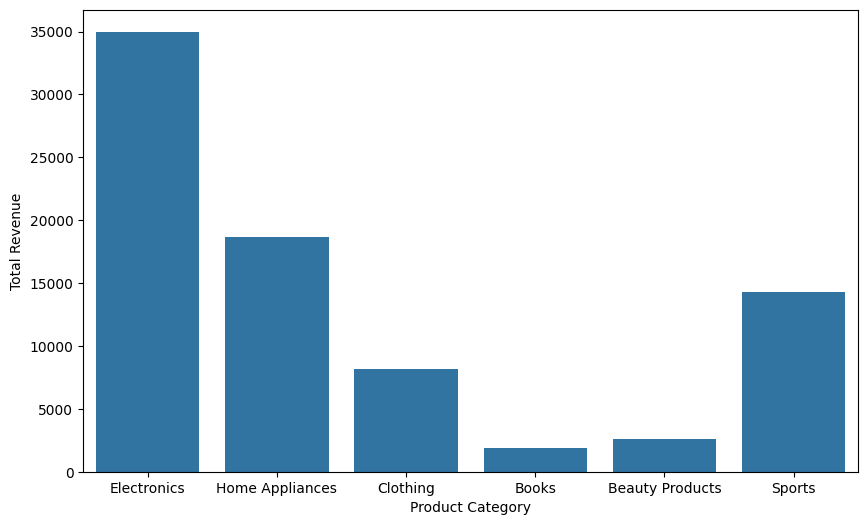

In [118]:

sales_data = pd.read_csv("sales_data.csv")
display(sales_data)
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Revenue', data=sales_data, estimator=sum ,errorbar =None)
plt.show()